In [37]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
# Import des bibliothèques
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Assurez-vous de télécharger les ressources nécessaires de nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benothmane/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benothmane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/benothmane/nltk_data...


True

In [3]:
# Chargement des jeux de données
data_train = pd.read_csv("/Users/benothmane/Desktop/Projet IA/data_train.csv") # chemin du dataset
data_test=pd.read_csv(r"/Users/benothmane/Desktop/Projet IA/data_test.csv")

In [6]:
# Exploration du dataset
data_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [15]:
data_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [32]:
# Prétraitement des données
data_train = data_train.fillna('')
data_test = data_test.fillna('')
data_train['total'] = data_train['title'] + ' ' + data_train['author'] + ' ' + data_train['text']
data_test['total'] = data_test['title'] + ' ' + data_test['author'] + ' ' + data_test['text']

In [33]:
# Vectorisation du texte
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(data_train['total'])
X_test = tfidf_vectorizer.transform(data_test['total'])
y_train = data_train['label']

In [39]:
# Création du modèle de forêt d'arbres décisionnels
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
# Entraînement du modèle
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Prédictions sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)

In [45]:
# Affichage des prédictions
print(y_pred)

[0 1 1 ... 0 1 0]


(-0.5, 799.5, 399.5, -0.5)

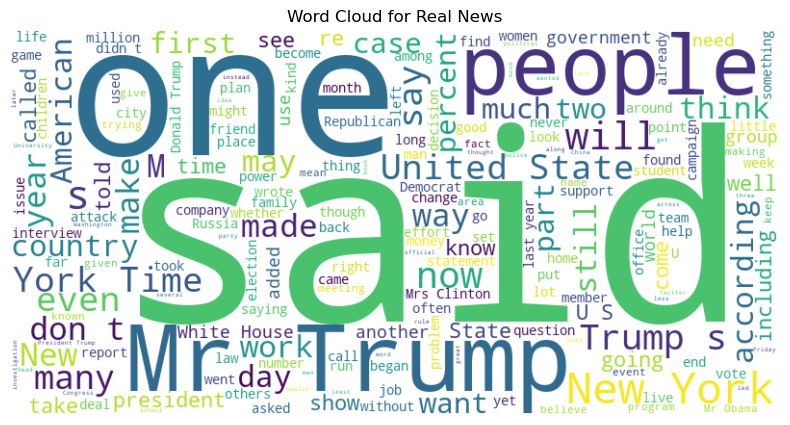

In [48]:
# Création d'un nuage de mots pour les vraies nouvelles
real_text = ' '.join(data_train[data_train['label'] == 0]['total'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')


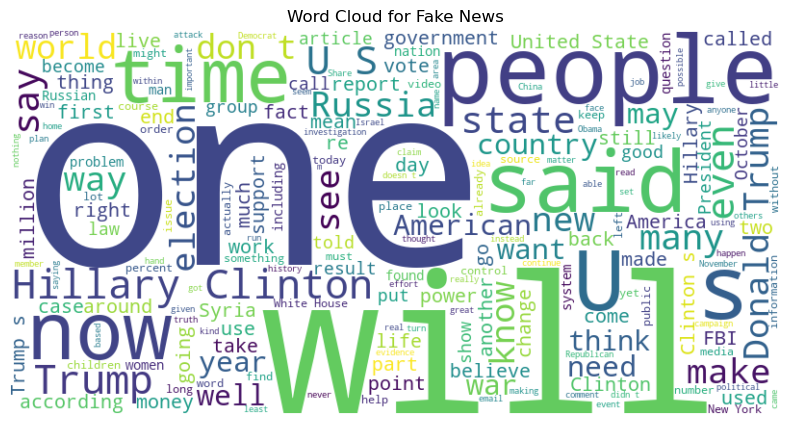

In [49]:
# Création d'un nuage de mots pour les fausses nouvelles
fake_text = ' '.join(data_train[data_train['label'] == 1]['total'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.show()

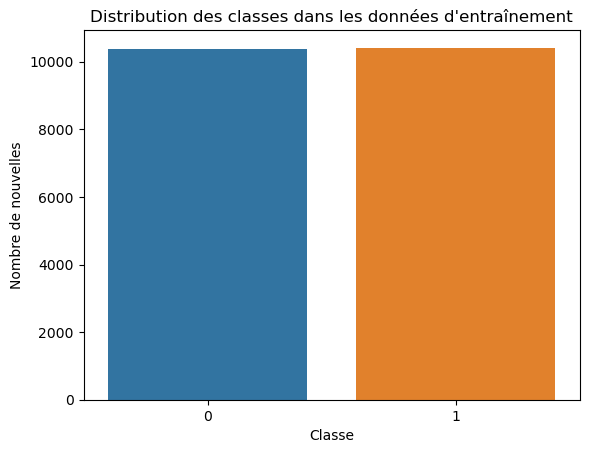

In [52]:
# Distribution des classes dans les données d'entraînement
sns.countplot(x='label', data=data_train)
plt.title('Distribution des classes dans les données d\'entraînement')
plt.xlabel('Classe')
plt.ylabel('Nombre de nouvelles')
plt.show()

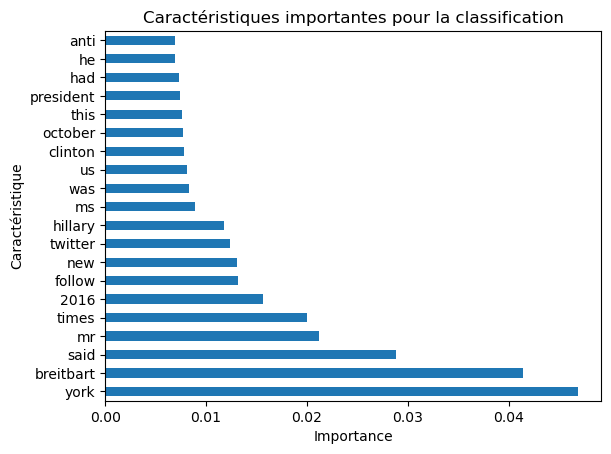

In [57]:
# Visualiser les caractéristiques importantes extraites par le modèle RandomForest
feature_importances = pd.Series(rf_classifier.feature_importances_, index=tfidf_vectorizer.get_feature_names_out())
top_features = feature_importances.sort_values(ascending=False).head(20)
top_features.plot(kind='barh')
plt.title('Caractéristiques importantes pour la classification')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.show()
